In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hydroeval as he
from functools import reduce
import datetime
import seaborn as sns

from CompressedSensingInterpolator import CompresedSensingInterpolator
from InterpolateHelperFunctions import *

site_names_list = ['BEN', 'BLI', 'BSL', 'CLE', 'CRB', 'DAI', 'DFF', 'DFL', 'DFM', 'DFU', 'HCL', 'HCN', 'IND', 'LAK', 'LDF', 'MIT', 'NEB', 'PBC', 'SBL', 'SFL', 'SHE', 'SHE_', 'SOL', 'SOL_', 'STR', 'TCU', 'TIE', 'WAN']
all_pressure_df = pd.read_csv("all_pressure.csv")
metrics_df = pd.read_csv("model_selection_metrics.csv")
parameters_max_nse = pd.read_csv("parameters_max_nse.csv")

In [22]:
#iterate through each site
for site_id in site_names_list:
    print(f"Working on site: {site_id}")

    site_df = pd.DataFrame()
    site_df[["datetime","pressure_hobo"]] = all_pressure_df[["datetime",site_id]]
    site_df['datetime'] = pd.to_datetime(site_df['datetime'], format='%Y-%m-%d %H:%M:%S')
    site_df = site_df[site_df['pressure_hobo'].notna()]
    all_days = pd.date_range(site_df['datetime'].min(), site_df['datetime'].max(), freq='15min')
    all_days = pd.DataFrame(all_days, columns=["datetime"])
    site_df = all_days.merge(site_df, on='datetime', how='left')

    
    #using the parameters from model selection, down sampling to every ___th sample and interpolating
    matrix_size = int(parameters_max_nse[parameters_max_nse["site"] == site_id]["matrix_size"].iloc[0])
    window_width = int(parameters_max_nse[parameters_max_nse["site"] == site_id]["mv_avg_width"].iloc[0])
    sparse_joined_df = down_sample_and_interpolate_once(site_df,all_days,matrix_size,1,'pressure_hobo')
    
    # creating rolling average column that will fill in gaps left by down sampling
    sparse_joined_df["rolling_average"] = sparse_joined_df["pressure_combined"].rolling(min_periods=1, center=True, window=window_width).mean()

    #merging the actual, interpolated, and rolling average columns
    sparse_joined_df['pressure_combined_filled'] = sparse_joined_df.apply(combine_pressure_row, axis=1)

    filled_df = sparse_joined_df

    #dynamically save filled df for this speciifc site
    exec(f'{site_id}_filled_df = filled_df')

    #exporting to csv
    filled_df.to_csv(f"../filled_pressure_data/{site_id}.csv")
    

Working on site: BEN
Down sampling to: 43


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 37666.74it/s]


Working on site: BLI
Down sampling to: 30


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 39833.84it/s]


Working on site: BSL
Down sampling to: 40


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 74076.83it/s]


Working on site: CLE
Down sampling to: 33


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 42005.00it/s]


Working on site: CRB
Down sampling to: 25


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 31602.77it/s]


Working on site: DAI
Down sampling to: 28


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 38295.75it/s]


Working on site: DFF
Down sampling to: 69


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 38374.24it/s]


Working on site: DFL
Down sampling to: 25


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 111219.35it/s]


Working on site: DFM
Down sampling to: 45


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 66220.97it/s]


Working on site: DFU
Down sampling to: 29


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 63040.96it/s]


Working on site: HCL
Down sampling to: 65


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 45327.66it/s]


Working on site: HCN
Down sampling to: 36


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 46936.10it/s]


Working on site: IND
Down sampling to: 55


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 111063.26it/s]


Working on site: LAK
Down sampling to: 15


creating design matrix: 100%|██████████| 3000/3000 [00:00<00:00, 6784.87it/s]


Working on site: LDF
Down sampling to: 43


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 30636.38it/s]


Working on site: MIT
Down sampling to: 19


creating design matrix: 100%|██████████| 3000/3000 [00:00<00:00, 15558.95it/s]


Working on site: NEB
Down sampling to: 26


creating design matrix: 100%|██████████| 3000/3000 [00:00<00:00, 13488.24it/s]


Working on site: PBC
Down sampling to: 30


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 15427.38it/s]


Working on site: SBL
Down sampling to: 44


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 62524.10it/s]


Working on site: SFL
Down sampling to: 51


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 11551.57it/s]


Working on site: SHE
Down sampling to: 15


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 7104.76it/s]


Working on site: SHE_
Down sampling to: 23


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 39488.81it/s]


Working on site: SOL
Down sampling to: 57


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 26576.17it/s]


Working on site: SOL_
Down sampling to: 23


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 5864.76it/s]


Working on site: STR
Down sampling to: 35


creating design matrix: 100%|██████████| 1000/1000 [00:00<00:00, 17700.25it/s]


Working on site: TCU
Down sampling to: 16


creating design matrix: 100%|██████████| 4000/4000 [00:00<00:00, 6582.94it/s]


Working on site: TIE
Down sampling to: 33


creating design matrix: 100%|██████████| 2000/2000 [00:00<00:00, 10357.04it/s]


Working on site: WAN
Down sampling to: 22


creating design matrix: 100%|██████████| 3000/3000 [00:00<00:00, 5960.75it/s] 


TTT

<Axes: xlabel='datetime', ylabel='pressure_filled'>

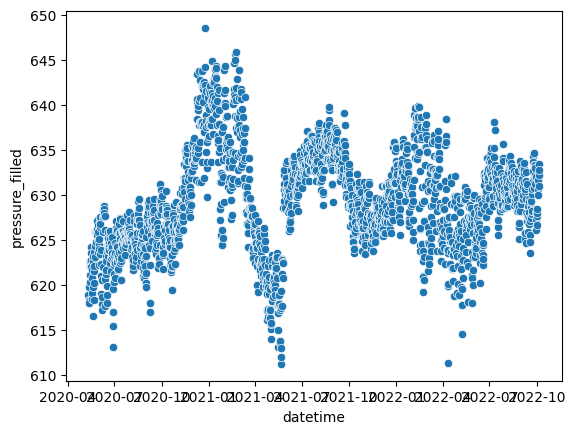

In [14]:
sns.scatterplot(x="datetime",y="pressure_filled",data=BEN_filled_df)


<Axes: xlabel='datetime', ylabel='pressure_combined_filled'>

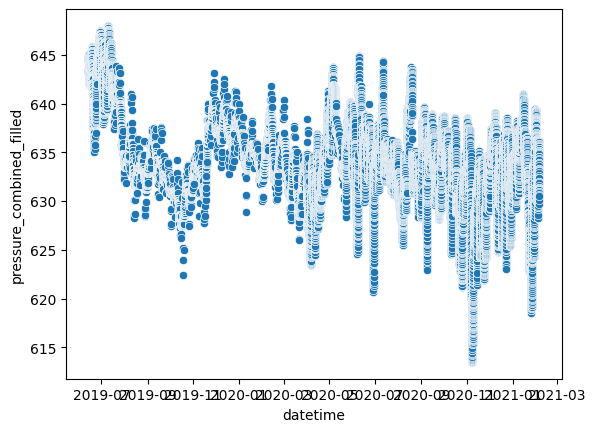

In [15]:
sns.scatterplot(x="datetime",y="pressure_combined_filled",data=BLI_filled_df)

datetime                    0.000000
index                       0.976736
pressure_filled             0.976736
pressure_hobo               0.406753
rolling_average             0.000000
pressure_combined           0.397286
pressure_combined_filled    0.000000
dtype: float64


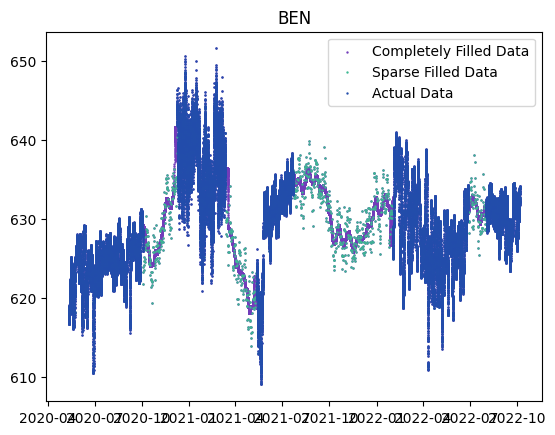

datetime                    0.000000
index                       0.965327
pressure_filled             0.965327
pressure_hobo               0.458002
rolling_average             0.000000
pressure_combined           0.442762
pressure_combined_filled    0.000000
dtype: float64


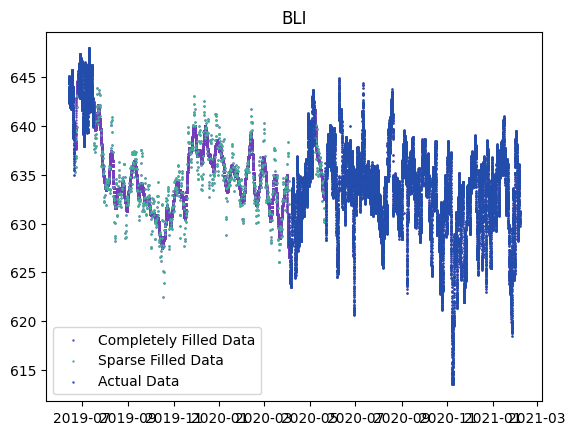

datetime                    0.000000
index                       0.959350
pressure_filled             0.959350
pressure_hobo               0.105986
rolling_average             0.000000
pressure_combined           0.103334
pressure_combined_filled    0.000000
dtype: float64


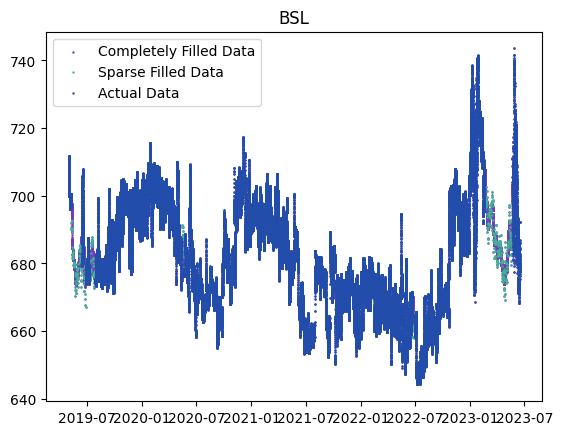

datetime                    0.000000
index                       0.968654
pressure_filled             0.968654
pressure_hobo               0.258698
rolling_average             0.000000
pressure_combined           0.250854
pressure_combined_filled    0.000000
dtype: float64


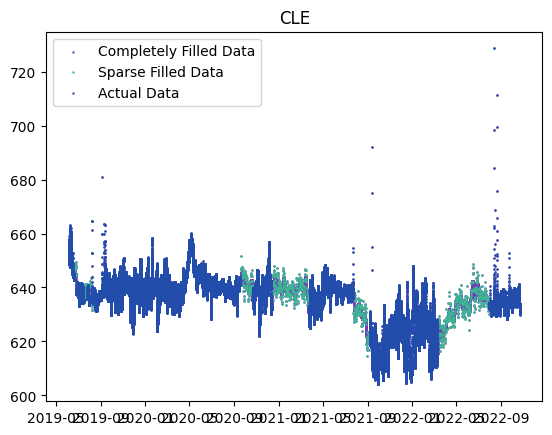

datetime                    0.000000
index                       0.959992
pressure_filled             0.959992
pressure_hobo               0.301872
rolling_average             0.000000
pressure_combined           0.289817
pressure_combined_filled    0.000000
dtype: float64


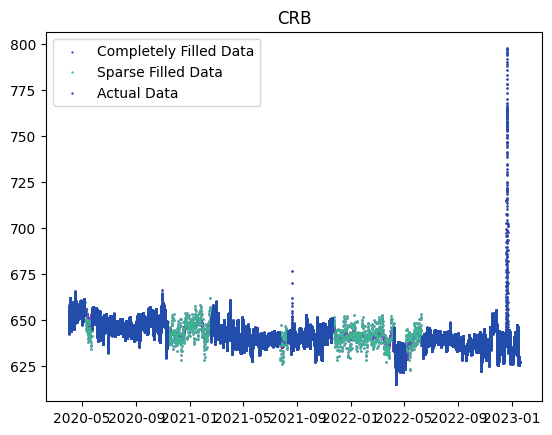

datetime                    0.000000
index                       0.956903
pressure_filled             0.956903
pressure_hobo               0.343411
rolling_average             0.000000
pressure_combined           0.331174
pressure_combined_filled    0.000000
dtype: float64


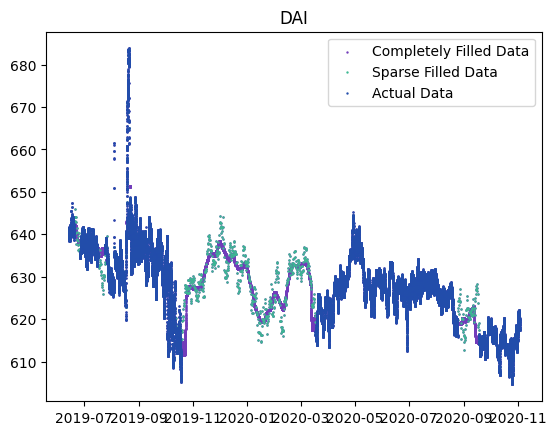

datetime                    0.000000
index                       0.976231
pressure_filled             0.976231
pressure_hobo               0.328564
rolling_average             0.000000
pressure_combined           0.323808
pressure_combined_filled    0.000000
dtype: float64


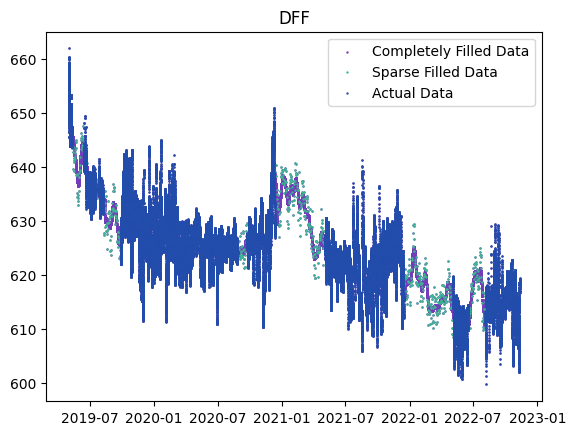

datetime                    0.000000
index                       0.882742
pressure_filled             0.882742
pressure_hobo               0.183897
rolling_average             0.000000
pressure_combined           0.176515
pressure_combined_filled    0.000000
dtype: float64


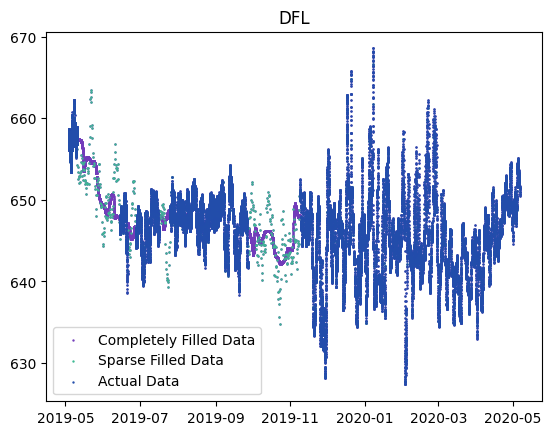

datetime                    0.000000
index                       0.971640
pressure_filled             0.971640
pressure_hobo               0.150614
rolling_average             0.000000
pressure_combined           0.147261
pressure_combined_filled    0.000000
dtype: float64


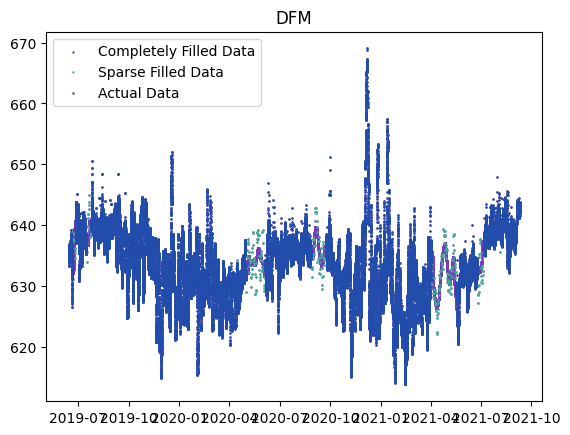

datetime                    0.000000
index                       0.903586
pressure_filled             0.903586
pressure_hobo               0.198802
rolling_average             0.000000
pressure_combined           0.191919
pressure_combined_filled    0.000000
dtype: float64


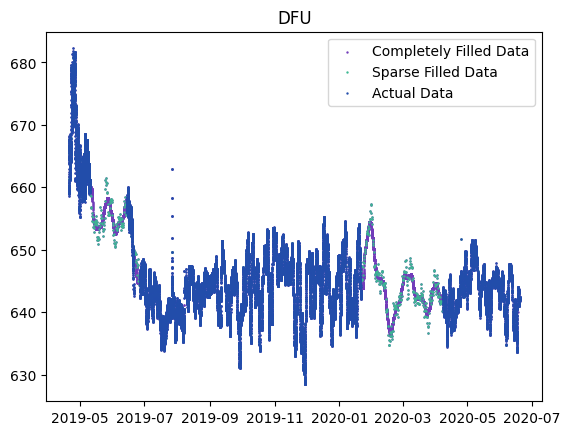

datetime                    0.000000
index                       0.983661
pressure_filled             0.983661
pressure_hobo               0.225794
rolling_average             0.000000
pressure_combined           0.222332
pressure_combined_filled    0.000000
dtype: float64


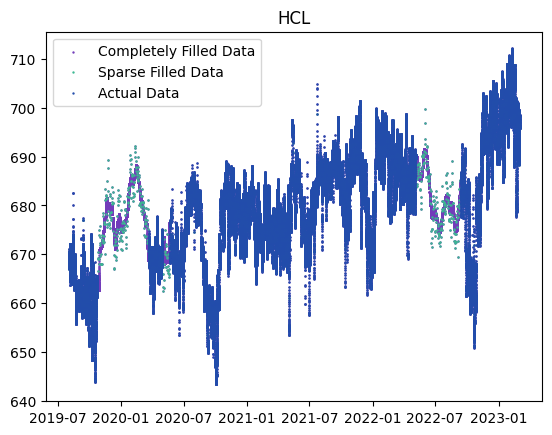

datetime                    0.000000
index                       0.966891
pressure_filled             0.966891
pressure_hobo               0.141331
rolling_average             0.000000
pressure_combined           0.137408
pressure_combined_filled    0.000000
dtype: float64


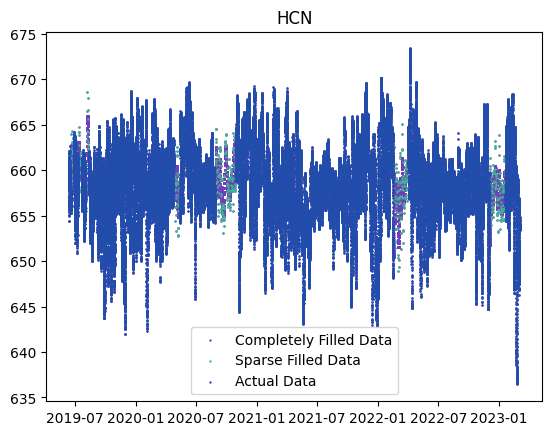

datetime                    0.000000
index                       0.981806
pressure_filled             0.981806
pressure_hobo               0.095839
rolling_average             0.000000
pressure_combined           0.094097
pressure_combined_filled    0.000000
dtype: float64


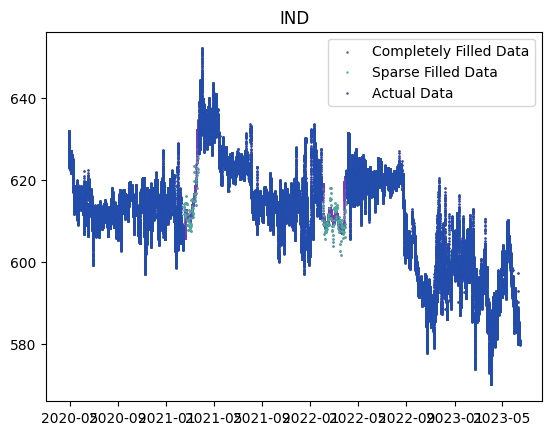

datetime                    0.000000
index                       0.930883
pressure_filled             0.930883
pressure_hobo               0.446309
rolling_average             0.000000
pressure_combined           0.416559
pressure_combined_filled    0.000000
dtype: float64


c:\Users\robby\Box\AbbottLab\Data\Management\ratingCurves\Compressed_Sensing\myenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


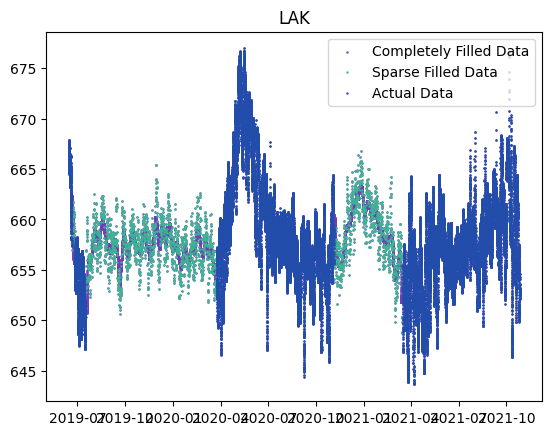

datetime                    0.000000
index                       0.976736
pressure_filled             0.976736
pressure_hobo               0.082214
rolling_average             0.000000
pressure_combined           0.080314
pressure_combined_filled    0.000000
dtype: float64


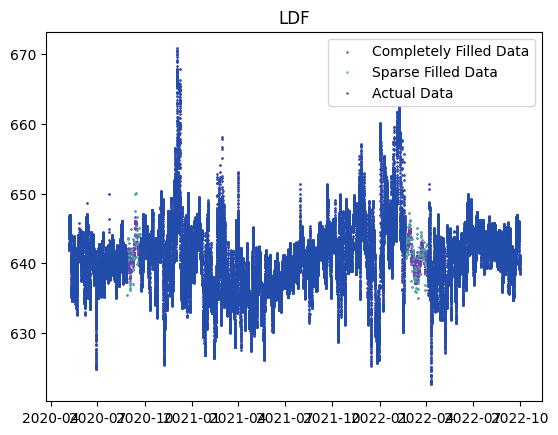

datetime                    0.000000
index                       0.947357
pressure_filled             0.947357
pressure_hobo               0.065382
rolling_average             0.000000
pressure_combined           0.061934
pressure_combined_filled    0.000000
dtype: float64


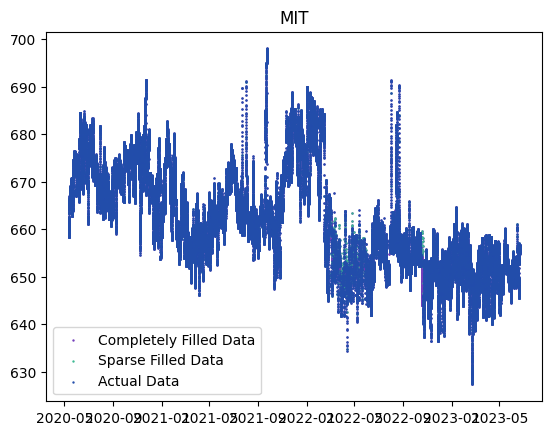

datetime                    0.000000
index                       0.956451
pressure_filled             0.956451
pressure_hobo               0.170907
rolling_average             0.000000
pressure_combined           0.164335
pressure_combined_filled    0.000000
dtype: float64


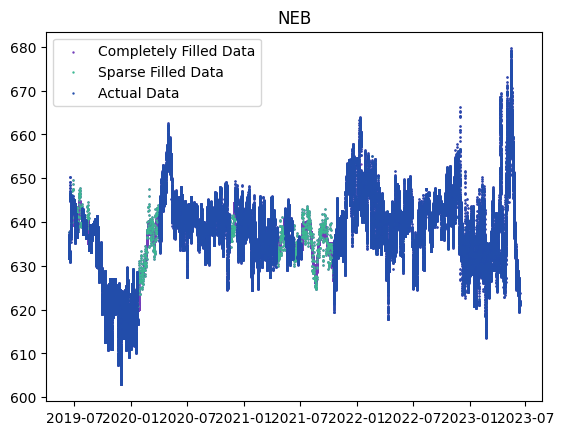

datetime                    0.000000
index                       0.965375
pressure_filled             0.965375
pressure_hobo               0.324641
rolling_average             0.000000
pressure_combined           0.313813
pressure_combined_filled    0.000000
dtype: float64


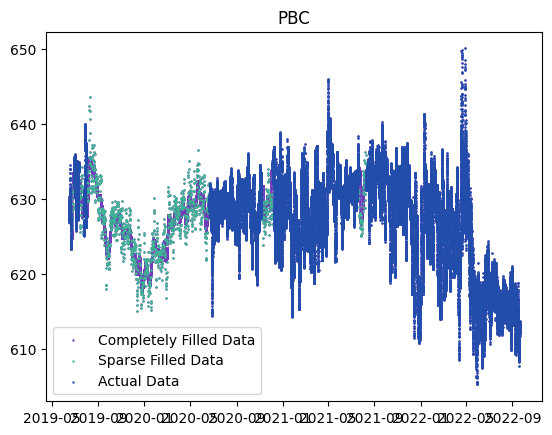

datetime                    0.000000
index                       0.972206
pressure_filled             0.972206
pressure_hobo               0.024714
rolling_average             0.000000
pressure_combined           0.024192
pressure_combined_filled    0.000000
dtype: float64


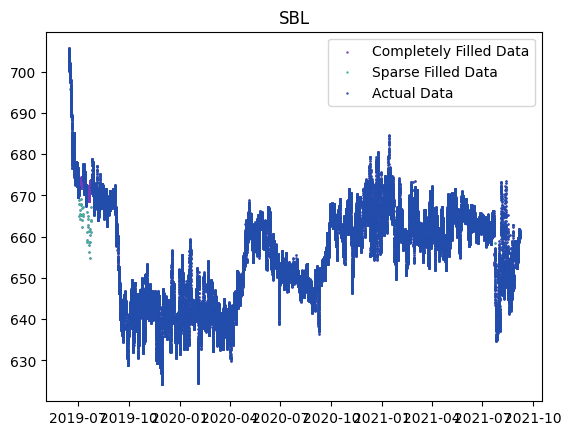

datetime                    0.000000
index                       0.980386
pressure_filled             0.980386
pressure_hobo               0.279282
rolling_average             0.000000
pressure_combined           0.273810
pressure_combined_filled    0.000000
dtype: float64


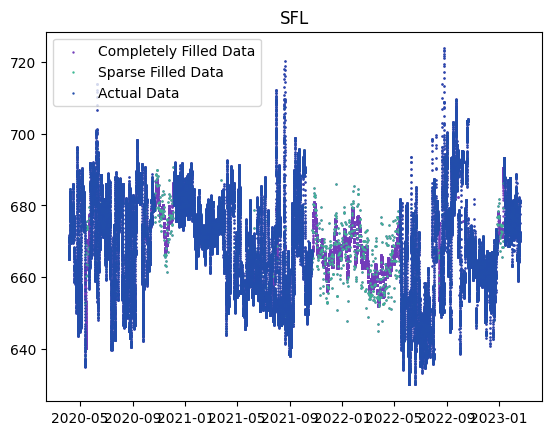

datetime                    0.000000
index                       0.924288
pressure_filled             0.924288
pressure_hobo               0.318575
rolling_average             0.000000
pressure_combined           0.297307
pressure_combined_filled    0.000000
dtype: float64


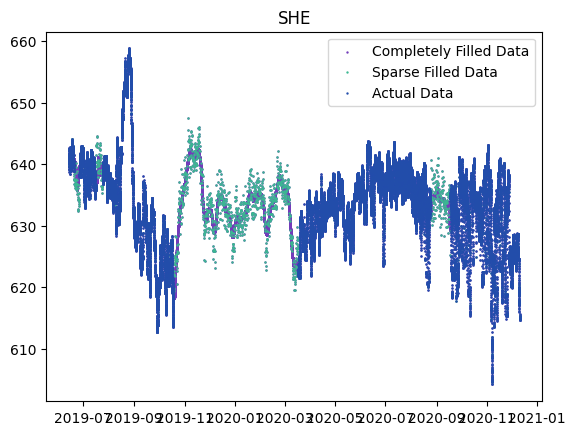

datetime                    0.000000
index                       0.945632
pressure_filled             0.945632
pressure_hobo               0.356849
rolling_average             0.000000
pressure_combined           0.341309
pressure_combined_filled    0.000000
dtype: float64


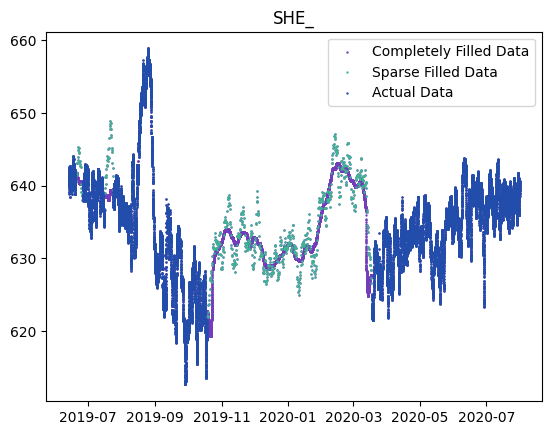

datetime                    0.000000
index                       0.982453
pressure_filled             0.982453
pressure_hobo               0.189367
rolling_average             0.000000
pressure_combined           0.186049
pressure_combined_filled    0.000000
dtype: float64


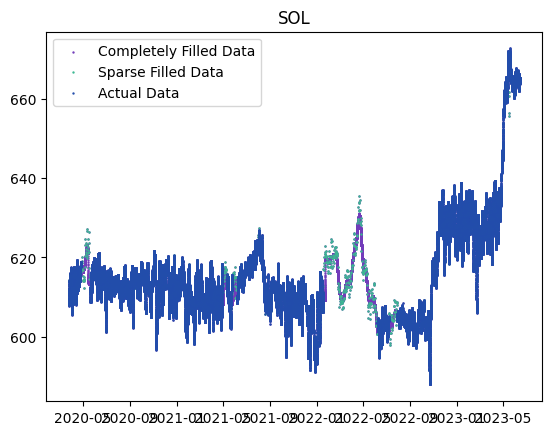

datetime                    0.000000
index                       0.956520
pressure_filled             0.956520
pressure_hobo               0.326401
rolling_average             0.000000
pressure_combined           0.312215
pressure_combined_filled    0.000000
dtype: float64


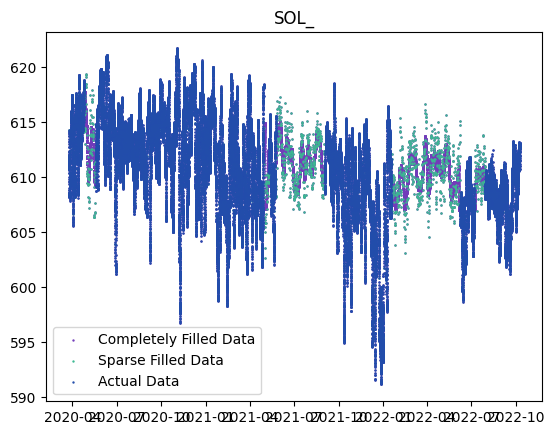

datetime                    0.000000
index                       0.971424
pressure_filled             0.971424
pressure_hobo               0.128103
rolling_average             0.000000
pressure_combined           0.124457
pressure_combined_filled    0.000000
dtype: float64


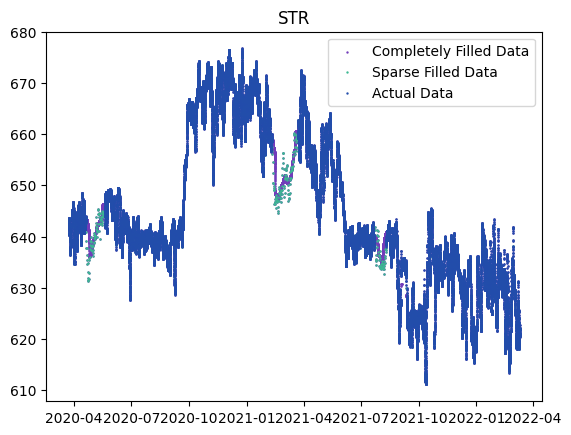

datetime                    0.000000
index                       0.926942
pressure_filled             0.926942
pressure_hobo               0.096088
rolling_average             0.000000
pressure_combined           0.090091
pressure_combined_filled    0.000000
dtype: float64


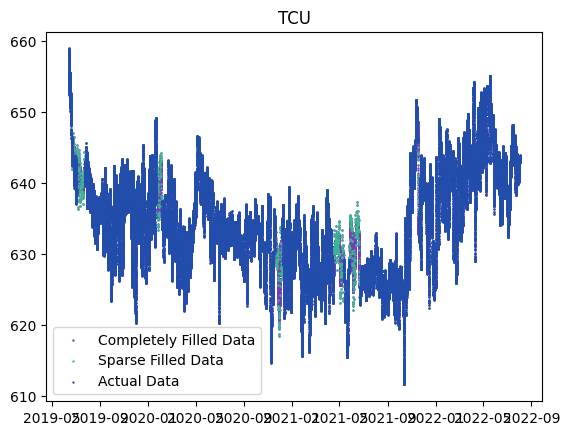

datetime                    0.000000
index                       0.968365
pressure_filled             0.968365
pressure_hobo               0.238401
rolling_average             0.000000
pressure_combined           0.231169
pressure_combined_filled    0.000000
dtype: float64


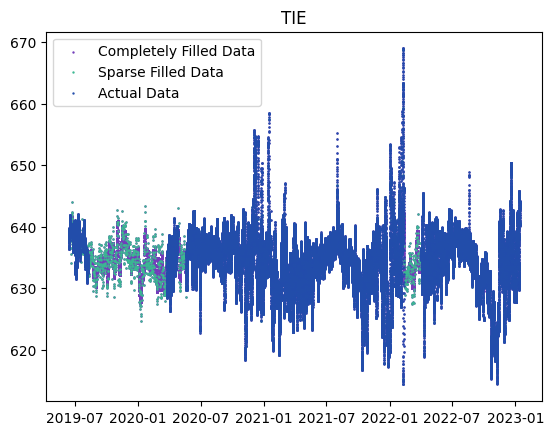

datetime                    0.000000
index                       0.947222
pressure_filled             0.947222
pressure_hobo               0.220021
rolling_average             0.000000
pressure_combined           0.210007
pressure_combined_filled    0.000000
dtype: float64


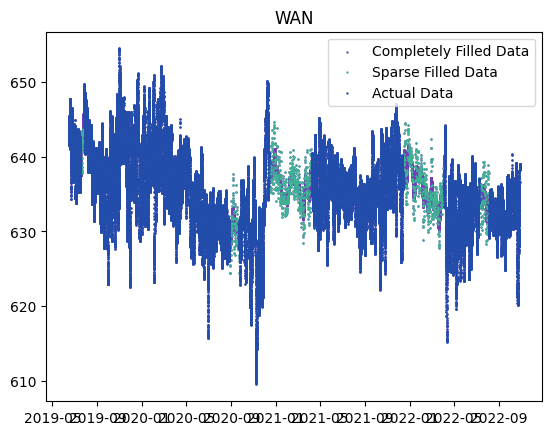

In [28]:

for site_id in site_names_list:

    exec(f"temp_df = {site_id}_filled_df")

    print(temp_df.isna().sum()/temp_df.shape[0])

    plt.scatter(x = "datetime", y = "pressure_combined_filled",data=temp_df, label="Completely Filled Data", s = .5, color="#723cba")
    plt.scatter(x = "datetime", y = "pressure_filled",data=temp_df, label="Sparse Filled Data", s = .5, color="#3bb892")
    plt.scatter(x = "datetime", y = "pressure_hobo",data=temp_df, label="Actual Data", s = .5, color="#224dab")

    # left = datetime.date(2020, 8, 1)
    # right = datetime.date(2020, 8, 2)

    # # # Format the date into months & days
    # # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y')) 
    # # Changes x-axis range
    # plt.gca().set_xbound(left, right)
    plt.title(site_id)
    plt.legend()
    plt.show()

In [6]:

# #combining the filled pressure dataframes for each site into one dataframe
# site_names_list = ['BEN', 'BLI', 'BSL', 'CLE', 'CRB', 'DAI', 'DFF', 'DFL', 'DFM', 'DFU', 'HCL', 'HCN', 'HCS', 'IND', 'LAK', 'LDF', 'MIT', 'NEB', 'PBC', 'SBL', 'SFL', 'SHE', 'SOL', 'STR', 'TCU', 'TIE']

# site_DF_list = []

# for site_id in site_names_list:
#     print(f"Adding site: {site_id}")
#     #adding to the list
#     exec(f"site_DF_list.append({site_id}_filled_df[['datetime','pressure_combined_filled']])") 

# #merging into one dataframe
# #filledPressDF = reduce(lambda  left,right: pd.merge(left,right,on=['datetime'], how='outer',suffixes=(None,site_id)), site_DF_list)


# #exporting csv
# #filledPressDF.to_csv("filled_all_pressure.csv")

Adding site: BEN
Adding site: BLI
Adding site: BSL



KeyboardInterrupt

